In [37]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [38]:
env = gym.make('Taxi-v3').env

In [39]:
env.observation_space

Discrete(500)

In [42]:
sta = env.observation_space.n
act = env.action_space.n
q_table = np.zeros([sta,act])
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [45]:
q_table.shape

(500, 6)

In [48]:
#Hyperparameter
alpha = 0.1
gamma = 0.9
epsilon = 0.1

In [47]:
#Plotting Metrics
reward_list = []
dropouts_list = []

In [58]:
episode_number = 10000
for i in range(1,episode_number):
    
    #Initialize Environment
    
    state = env.reset()
    
    reward_count = 0
    dropout_count = 0
    
    while True:
        
        #Exploit vs Explore to find action (Epsilon Greedy)
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
            
        else:
            action = np.argmax(q_table[state])
            
        #Action Process and Reward / Observation
        next_state, reward, done, _ = env.step(action)
        

        #Q Learning Function
        
        old_value = q_table[state,action]
        
        next_max = np.max(q_table[next_state])
        
        
        
        next_value = (1-alpha)*old_value + alpha*(reward+ gamma*next_max)
        
        #Q Table Update
        
        q_table[state,action] = next_value
        
        #Update State
        
        state = next_state
        
        #Find Wrong Drop offs
        
        if reward == -10:
            dropout_count +=1
        
        
        
        reward_count += 1         

        
        
        if done:
            break
            
    
    if i%10 == 0:        
        dropouts_list.append(dropout_count)
        reward_list.append(reward_count)
        print("Episode: {}, Reward: {}, Wrong Dropout: {}".format(i,reward_count,dropout_count))

Episode: 10, Reward: 13, Wrong Dropout: 0
Episode: 20, Reward: 9, Wrong Dropout: 0
Episode: 30, Reward: 12, Wrong Dropout: 0
Episode: 40, Reward: 12, Wrong Dropout: 0
Episode: 50, Reward: 19, Wrong Dropout: 2
Episode: 60, Reward: 19, Wrong Dropout: 3
Episode: 70, Reward: 9, Wrong Dropout: 1
Episode: 80, Reward: 9, Wrong Dropout: 0
Episode: 90, Reward: 15, Wrong Dropout: 1
Episode: 100, Reward: 10, Wrong Dropout: 1
Episode: 110, Reward: 15, Wrong Dropout: 0
Episode: 120, Reward: 11, Wrong Dropout: 1
Episode: 130, Reward: 10, Wrong Dropout: 0
Episode: 140, Reward: 11, Wrong Dropout: 0
Episode: 150, Reward: 16, Wrong Dropout: 0
Episode: 160, Reward: 15, Wrong Dropout: 0
Episode: 170, Reward: 19, Wrong Dropout: 1
Episode: 180, Reward: 14, Wrong Dropout: 0
Episode: 190, Reward: 13, Wrong Dropout: 1
Episode: 200, Reward: 13, Wrong Dropout: 2
Episode: 210, Reward: 20, Wrong Dropout: 1
Episode: 220, Reward: 20, Wrong Dropout: 0
Episode: 230, Reward: 19, Wrong Dropout: 1
Episode: 240, Reward: 1

Episode: 1910, Reward: 22, Wrong Dropout: 1
Episode: 1920, Reward: 12, Wrong Dropout: 0
Episode: 1930, Reward: 14, Wrong Dropout: 0
Episode: 1940, Reward: 12, Wrong Dropout: 0
Episode: 1950, Reward: 14, Wrong Dropout: 1
Episode: 1960, Reward: 11, Wrong Dropout: 0
Episode: 1970, Reward: 13, Wrong Dropout: 0
Episode: 1980, Reward: 17, Wrong Dropout: 1
Episode: 1990, Reward: 17, Wrong Dropout: 0
Episode: 2000, Reward: 15, Wrong Dropout: 2
Episode: 2010, Reward: 16, Wrong Dropout: 1
Episode: 2020, Reward: 16, Wrong Dropout: 1
Episode: 2030, Reward: 13, Wrong Dropout: 0
Episode: 2040, Reward: 10, Wrong Dropout: 0
Episode: 2050, Reward: 10, Wrong Dropout: 1
Episode: 2060, Reward: 18, Wrong Dropout: 2
Episode: 2070, Reward: 17, Wrong Dropout: 1
Episode: 2080, Reward: 19, Wrong Dropout: 2
Episode: 2090, Reward: 19, Wrong Dropout: 0
Episode: 2100, Reward: 11, Wrong Dropout: 0
Episode: 2110, Reward: 23, Wrong Dropout: 1
Episode: 2120, Reward: 28, Wrong Dropout: 0
Episode: 2130, Reward: 14, Wrong

Episode: 3900, Reward: 13, Wrong Dropout: 1
Episode: 3910, Reward: 20, Wrong Dropout: 2
Episode: 3920, Reward: 12, Wrong Dropout: 0
Episode: 3930, Reward: 16, Wrong Dropout: 2
Episode: 3940, Reward: 16, Wrong Dropout: 0
Episode: 3950, Reward: 13, Wrong Dropout: 0
Episode: 3960, Reward: 18, Wrong Dropout: 0
Episode: 3970, Reward: 11, Wrong Dropout: 0
Episode: 3980, Reward: 19, Wrong Dropout: 1
Episode: 3990, Reward: 15, Wrong Dropout: 0
Episode: 4000, Reward: 16, Wrong Dropout: 0
Episode: 4010, Reward: 23, Wrong Dropout: 2
Episode: 4020, Reward: 16, Wrong Dropout: 1
Episode: 4030, Reward: 20, Wrong Dropout: 0
Episode: 4040, Reward: 14, Wrong Dropout: 0
Episode: 4050, Reward: 14, Wrong Dropout: 0
Episode: 4060, Reward: 21, Wrong Dropout: 0
Episode: 4070, Reward: 14, Wrong Dropout: 1
Episode: 4080, Reward: 14, Wrong Dropout: 1
Episode: 4090, Reward: 18, Wrong Dropout: 1
Episode: 4100, Reward: 12, Wrong Dropout: 1
Episode: 4110, Reward: 10, Wrong Dropout: 1
Episode: 4120, Reward: 10, Wrong

Episode: 5970, Reward: 16, Wrong Dropout: 2
Episode: 5980, Reward: 16, Wrong Dropout: 0
Episode: 5990, Reward: 12, Wrong Dropout: 0
Episode: 6000, Reward: 23, Wrong Dropout: 1
Episode: 6010, Reward: 9, Wrong Dropout: 0
Episode: 6020, Reward: 9, Wrong Dropout: 0
Episode: 6030, Reward: 6, Wrong Dropout: 0
Episode: 6040, Reward: 15, Wrong Dropout: 0
Episode: 6050, Reward: 8, Wrong Dropout: 0
Episode: 6060, Reward: 21, Wrong Dropout: 1
Episode: 6070, Reward: 10, Wrong Dropout: 0
Episode: 6080, Reward: 13, Wrong Dropout: 0
Episode: 6090, Reward: 11, Wrong Dropout: 0
Episode: 6100, Reward: 15, Wrong Dropout: 0
Episode: 6110, Reward: 17, Wrong Dropout: 0
Episode: 6120, Reward: 15, Wrong Dropout: 1
Episode: 6130, Reward: 13, Wrong Dropout: 0
Episode: 6140, Reward: 12, Wrong Dropout: 0
Episode: 6150, Reward: 15, Wrong Dropout: 0
Episode: 6160, Reward: 18, Wrong Dropout: 0
Episode: 6170, Reward: 13, Wrong Dropout: 0
Episode: 6180, Reward: 8, Wrong Dropout: 1
Episode: 6190, Reward: 19, Wrong Drop

Episode: 8110, Reward: 16, Wrong Dropout: 0
Episode: 8120, Reward: 13, Wrong Dropout: 0
Episode: 8130, Reward: 16, Wrong Dropout: 0
Episode: 8140, Reward: 7, Wrong Dropout: 0
Episode: 8150, Reward: 17, Wrong Dropout: 0
Episode: 8160, Reward: 14, Wrong Dropout: 0
Episode: 8170, Reward: 10, Wrong Dropout: 0
Episode: 8180, Reward: 15, Wrong Dropout: 0
Episode: 8190, Reward: 10, Wrong Dropout: 0
Episode: 8200, Reward: 9, Wrong Dropout: 0
Episode: 8210, Reward: 11, Wrong Dropout: 1
Episode: 8220, Reward: 15, Wrong Dropout: 1
Episode: 8230, Reward: 14, Wrong Dropout: 0
Episode: 8240, Reward: 16, Wrong Dropout: 0
Episode: 8250, Reward: 11, Wrong Dropout: 0
Episode: 8260, Reward: 17, Wrong Dropout: 0
Episode: 8270, Reward: 11, Wrong Dropout: 0
Episode: 8280, Reward: 14, Wrong Dropout: 0
Episode: 8290, Reward: 16, Wrong Dropout: 1
Episode: 8300, Reward: 12, Wrong Dropout: 0
Episode: 8310, Reward: 21, Wrong Dropout: 1
Episode: 8320, Reward: 16, Wrong Dropout: 0
Episode: 8330, Reward: 13, Wrong D

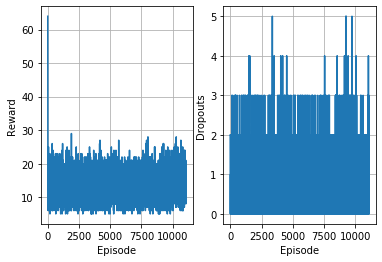

In [59]:
fig, axes = plt.subplots(1,2)
axes[0].plot(reward_list)
axes[0].set_xlabel("Episode")
axes[0].set_ylabel("Reward")

axes[1].plot(dropouts_list)
axes[1].set_xlabel("Episode")
axes[1].set_ylabel("Dropouts")

axes[0].grid(True)
axes[1].grid(True)

plt.show()

In [62]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.58580365,  0.4597151 , -0.585791  ,  0.45970698,  1.62261467,
        -8.53957422],
       [ 4.34822299,  5.94215296,  4.34834005,  5.94298381,  7.7147    ,
        -3.05675841],
       ...,
       [-0.28718579,  0.81015438, -0.02353711,  5.94170913, -1.909     ,
        -1.909     ],
       [-1.56841535, -1.64703678, -2.74568631,  2.9130045 , -4.22353439,
        -5.70799357],
       [ 5.53685605,  5.43314021,  4.78720205, 17.        ,  1.57796721,
         0.79383089]])

In [71]:
from pandas import DataFrame
table_q = DataFrame(q_table)
table_q.head(100)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.585804,0.459715,-0.585791,0.459707,1.622615,-8.539574
2,4.348223,5.942153,4.348340,5.942984,7.714700,-3.056758
3,0.460132,1.619014,0.458857,1.621058,2.914016,-7.376688
4,-5.566776,-5.701669,-4.996845,-5.705409,-12.279543,-8.178886
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-5.653803,-5.730879,-4.996845,-5.734342,-9.350281,-10.213367
7,-3.136962,-4.260688,-4.226924,-4.489058,-8.194912,-10.038951
8,1.622615,-2.926317,-2.772706,-2.598855,-6.617567,-5.515171
9,-2.374403,-4.706798,-4.707815,-5.074907,-9.124061,-9.825673


In [69]:
env.s = env.encode(0,4,3,4)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [70]:
env.encode(0,4,3,4)

96

In [67]:
env.s = env.encode(4,4,4,3)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (Dropoff)


In [4]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
print('State space: ', env.observation_space)

State space:  Discrete(500)


In [6]:
print('Action space: ', env.action_space)

Action space:  Discrete(6)


In [7]:
state = env.encode(3,1,2,3)
print('State Number: ',state)

State Number:  331


In [8]:
env.s = state
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [9]:
env.P[331]

{0: [(1.0, 431, -1, False)],
 1: [(1.0, 231, -1, False)],
 2: [(1.0, 351, -1, False)],
 3: [(1.0, 331, -1, False)],
 4: [(1.0, 331, -10, False)],
 5: [(1.0, 331, -10, False)]}

In [10]:
ACTIONS = '''
0: South
1: North
2: East
3: West
4: Pick up
5: Drop off
'''

In [11]:
env.reset() #reset env, back to an initial random state

208

In [18]:
time_step = 0
total_reward = 0
list_visualize = []
while True:
    
    time_step += 1
    
    #Choose action
    action = env.action_space.sample()
    
    #Perform action and get reward
    
    state, reward, done, _ = env.step(action) #state = next state
    #Total reward
    total_reward += reward
    
    #visualize
    list_visualize.append({"frame": env.render(mode = 'ansi'), "state": state, "action": action, "reward": reward,
                           "Total Reward":total_reward})
    
    
    if done:
        break

In [32]:
import time
for i, frame in enumerate(list_visualize):
    print(frame.get("frame"))
    print("Timestep: ", i+1)
    print("State: ", frame["state"])
    print("Action: ", frame["action"])
    print("Reward: ", frame["reward"])
    print("TotalReward: ", frame["Total Reward"])
    time.sleep(1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep:  1
State:  100
Action:  0
Reward:  -1
TotalReward:  -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Timestep:  2
State:  100
Action:  3
Reward:  -1
TotalReward:  -2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Timestep:  3
State:  120
Action:  2
Reward:  -1
TotalReward:  -3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Timestep:  4
State:  100
Action:  3
Reward:  -1
TotalReward:  -4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep:  5
State:  200
Action:  0
Reward:  -1
TotalReward:  -5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep:  6
State:  300
Action:  0
Reward:  -1
TotalReward:  -6
+---------+
|R: | : :G|
| : | : : |
| : : :

KeyboardInterrupt: 

In [33]:
type(list_visualize)    

list

In [34]:
list_visualize[0]

{'frame': '+---------+\n|\x1b\x1bR\x1b\x1b: | : :G|\n|\x1b \x1b: | : : |\n| : : : : |\n| | : | : |\n|Y| : |B: |\n+---------+\n  (South)\n',
 'state': 100,
 'action': 0,
 'reward': -1,
 'Total Reward': -1}

In [36]:
len(list_visualize[0])

5